# Black Friday Sale
This notebook contain the sale prediction of the company called ABC company. The company wants to create the machine learning model to predict and understand the customer purchase behaviour.

For this problem, we follow up some steps to keep ourself on the track.
1. Problem Statement
2. Understand the Data
3. Feature Engineering
4. Modeling
5. Experimentation

## 1. Problem Statement
A retail company `ABC Private Limited` wants to understand the customer purchase behaviour against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics, product details and Total purchase amount from last month.

## 2. Understand the Data
* **User_ID**	User ID
* **Product_ID**	Product ID
* **Gender**	Sex of User
* **Age**	Age in bins
* **Occupation**	Occupation (Masked)
* **City_Category**	Category of the City (A,B,C)
* **Stay_In_Current_City_Years**	Number of years stay in current city
* **Marital_Status**	Marital Status
* **Product_Category_1**	Product Category (Masked)
* **Product_Category_2**	Product may belongs to other category also (Masked)
* **Product_Category_3**	Product may belongs to other category also (Masked)
* **Purchase**	Purchase Amount (Target Variable)

## 3. Feature Engineering

In this section we perform the feature engineering to manipulate the data and understand it more better. We fill out the missing value in this section and turns the data into numerical values.

In [128]:
PATH = '/content/drive/MyDrive/Red Black Sale/data'
IMG_PATH = '/content/drive/MyDrive/Red Black Sale/img'

In [129]:
train_path = PATH + "/train.csv"
test_path = PATH + "/test.csv"

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
len(train)

550068

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Check out the missing values and plot that values as a graph and visualize it.

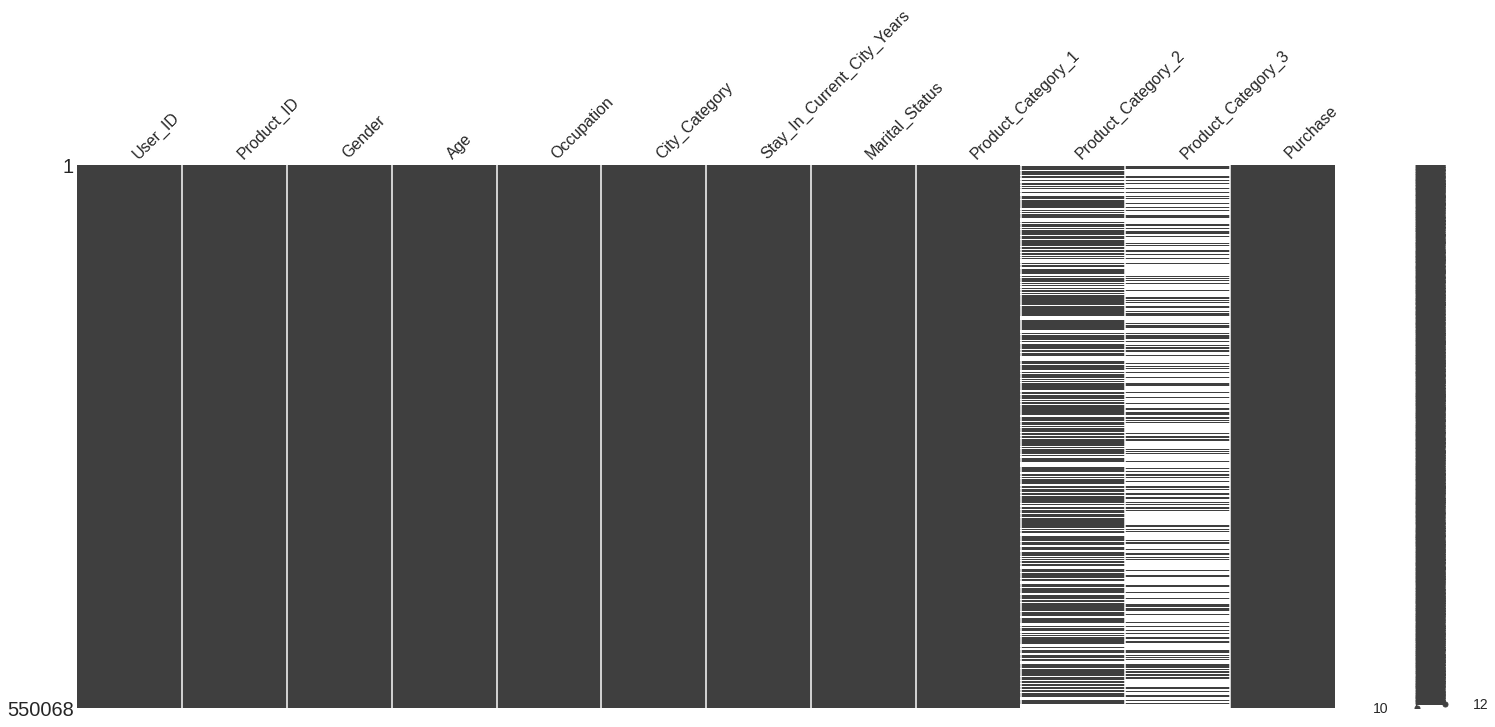

In [ ]:
fig = missingno.matrix(train);
fig_save = fig.get_figure()
fig_save.savefig(IMG_PATH + '/missingno_matrix.png')

In [ ]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Since we have a lots of missing value in the `Product_Category_2` and `Product_Category_3` so we remove these value from the dataset.

In [ ]:
train = train.drop(['Product_Category_2', 'Product_Category_3'], axis=1)
test = test.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

We prepare our data for training the machine learning model. Lets save the dataset and perform the data evaluation on the data that we have created.

In [ ]:
train.to_csv(PATH+'/train_updated.csv', index=False)
test.to_csv(PATH+'/test_updated.csv', index=False)

In [ ]:
train_df = pd.read_csv(PATH+'/train_updated.csv')
test_df = pd.read_csv(PATH+'/test_updated.csv')

In [ ]:
len(pd.get_dummies(train_df).columns), len(pd.get_dummies(test_df).columns)

(3653, 3512)

In [ ]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Data Evaluation
Lets perform the Data Evaluation to understand the data and know which features are highly important for the target variable.

Gender Evaluation 

**Description:** Sex of User


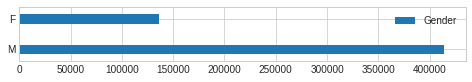

In [ ]:
pd.DataFrame(train_df.Gender.value_counts()).plot(kind='barh', width=0.3, figsize=(8, 1));


So we see that we have more number of male customer involving in the Black Friday Sale.

Age Evaluation

**Description:** Age in bins

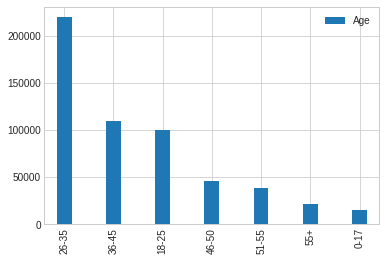

In [ ]:
pd.DataFrame(train_df.Age.value_counts()).plot(kind="bar", width=0.3);

So, we have a more number of customer lies in the age group of 26 to 35 years old that are taking intrest in the sale.

Ocupation Evaluation

**Description:** Occupation (Masked)

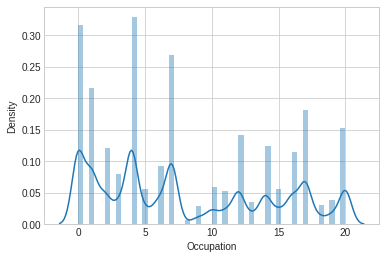

In [ ]:
sns.distplot(train_df.Occupation);

As we see that occupation label with the value 4 have the highest number of density. Till now we dont know the meaning of this number as this is not mention in the competition desription.

City Evaluation

**Description:** Category of the City (A,B,C)

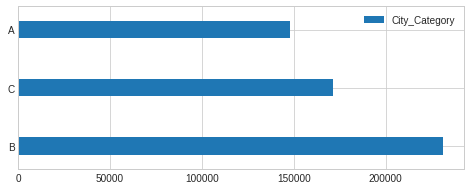

In [ ]:
pd.DataFrame(train_df.City_Category.value_counts()).plot(kind='barh', width=0.3, figsize=(8, 3));

So, City with B value have the maximum number of customer belonging to that are purchasing the products from the Black Friday Sale.

Marital Status Evaluation

**Description:** Marital Status

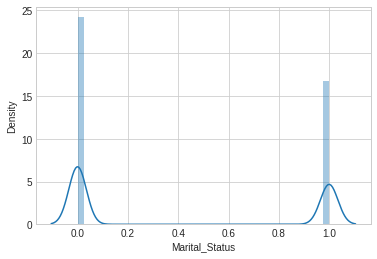

In [ ]:
sns.distplot(train_df.Marital_Status);

So, most of the customer not married (assume by us) are involving in the sale.

Product Category 1 Evaluation

**Description:** Product Category (Masked)

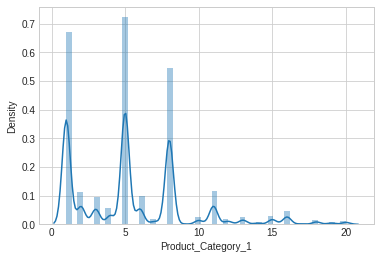

In [ ]:
sns.distplot(train_df.Product_Category_1);

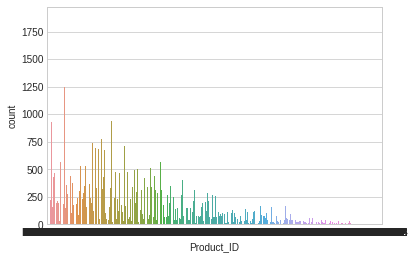

In [ ]:
sns.countplot(train_df.Product_ID);

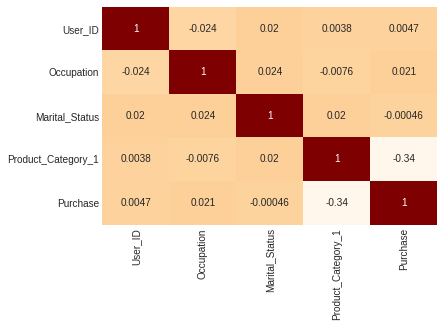

In [ ]:
sns.heatmap(train_df.corr(), annot=True, cbar=False, cmap='OrRd');

Lets plot the graph between all the positive value and understand the realtion between them.

Plot the graph between the `Purchase` and the `Occupation` labels.

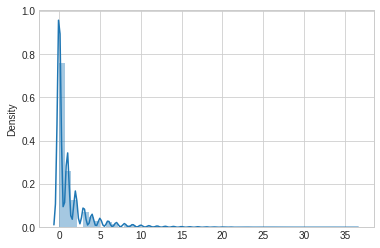

In [ ]:
sns.distplot(pd.crosstab(train_df.Purchase, train_df.Occupation));

Now plot the graph between the `Marital Status` and the `Occupation` and see the realtion between them.

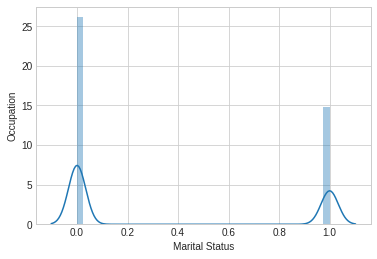

In [ ]:
sns.distplot(pd.DataFrame(train_df['Marital_Status'], train_df['Occupation']));
plt.xlabel('Marital Status')
plt.ylabel('Occupation');

Lets check the realtion between the `UserId` and the `Purchase` and see whether any user is repeated or not.

In [143]:
one_hot = OneHotEncoder()
object_label = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

transformer = ColumnTransformer([('object', one_hot, object_label)], remainder='passthrough')
data = np.array(transformer.fit_transform(train_df))
data

array(<550068x3653 sparse matrix of type '<class 'numpy.float64'>'
	with 5106311 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [144]:
len(train_df['User_ID'].unique())

5891